<a href="https://colab.research.google.com/github/Shamoonansari/Codsoft/blob/main/task2/Movie_Rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOVIE RATING PREDICTION MODEL:

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

# Data Description :

In [ ]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.shape

(15509, 10)

In [ ]:
df.dropna(inplace=True)
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [ ]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df.shape

(5659, 10)

In [ ]:
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)

In [ ]:
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

In [ ]:
df["Year"].head()

1    2019.0
3    2019.0
5    1997.0
6    2005.0
8    2012.0
Name: Year, dtype: float64

In [ ]:
genre=df['Genre']
genre.head(10)

1                         Drama
3               Comedy, Romance
5        Comedy, Drama, Musical
6           Drama, Romance, War
8     Horror, Mystery, Thriller
9       Action, Crime, Thriller
10                        Drama
11                       Horror
12    Horror, Romance, Thriller
13       Comedy, Drama, Romance
Name: Genre, dtype: object

In [ ]:
genres=df['Genre'].str.split(',',expand=True)
genres.head(10)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller
9,Action,Crime,Thriller
10,Drama,None,None
11,Horror,None,None
12,Horror,Romance,Thriller
13,Comedy,Drama,Romance


In [ ]:
from collections import Counter

# Flatten the 'genres' Series and remove None values
genre_list = [genre for genre in genres.values.flatten() if genre is not None]

# Use Counter to count occurrences of each genre
genre_counts = Counter(genre_list)

# Sort the genre counts by genre name
sorted_genre_counts = dict(sorted(genre_counts.items()))

for genre, count in sorted_genre_counts.items():
    print(f"{genre}: {count}")


 Action: 34
 Adventure: 172
 Biography: 31
 Comedy: 355
 Crime: 604
 Drama: 1954
 Family: 364
 Fantasy: 115
 History: 91
 Horror: 74
 Music: 50
 Musical: 322
 Mystery: 245
 News: 1
 Romance: 1221
 Sci-Fi: 28
 Sport: 38
 Thriller: 590
 War: 30
 Western: 1
Action: 1652
Adventure: 105
Animation: 40
Biography: 84
Comedy: 989
Crime: 271
Documentary: 48
Drama: 1842
Family: 52
Fantasy: 31
History: 8
Horror: 128
Music: 3
Musical: 90
Mystery: 59
Romance: 159
Sci-Fi: 4
Sport: 2
Thriller: 89
War: 3


In [ ]:
genresPie = df['Genre'].value_counts()
genresPie.head(10)

Drama                     844
Drama, Romance            332
Action, Crime, Drama      329
Action, Drama             206
Comedy, Drama             205
Comedy, Drama, Romance    188
Comedy                    187
Action                    170
Drama, Family             160
Romance                   126
Name: Genre, dtype: int64

In [ ]:
genrePie = pd.DataFrame(genresPie.items(), columns=['Genre', 'Count'])
genrePie.head(10)

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205
5,"Comedy, Drama, Romance",188
6,Comedy,187
7,Action,170
8,"Drama, Family",160
9,Romance,126


In [ ]:
df["Votes"] = df["Votes"].str.replace(',', '').astype(int)
df["Votes"].head(10)

1        8
3       35
5      827
6     1086
8      326
9       11
10      17
11      59
12     983
13     512
Name: Votes, dtype: int64

In [ ]:
df["Director"].nunique()

2431

In [ ]:
directors = df["Director"].value_counts()
directors.head(10)

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal           22
Name: Director, dtype: int64

In [ ]:
actors = df[['Actor 1', 'Actor 2', 'Actor 3']].stack().dropna().value_counts()
actors.head(5)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
dtype: int64

# Data Visualization

In [ ]:

!pip install wordcloud

In [ ]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud

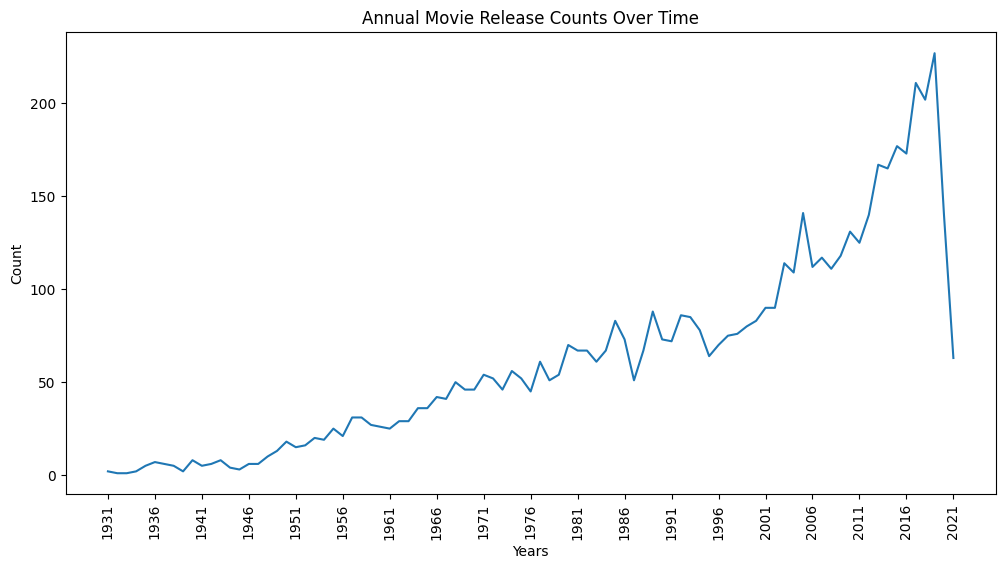

In [ ]:
# Calculate the annual movie release counts and sort by year
yearly_counts = df['Year'].value_counts().sort_index()

# Create the line plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=yearly_counts)
ax.set(title="Annual Movie Release Counts Over Time",
       xlabel="Years",
       ylabel="Count")
ax.set_xticks(range(int(min(yearly_counts.index)), int(max(yearly_counts.index)) + 1, 5))
plt.xticks(rotation=90)
plt.show()

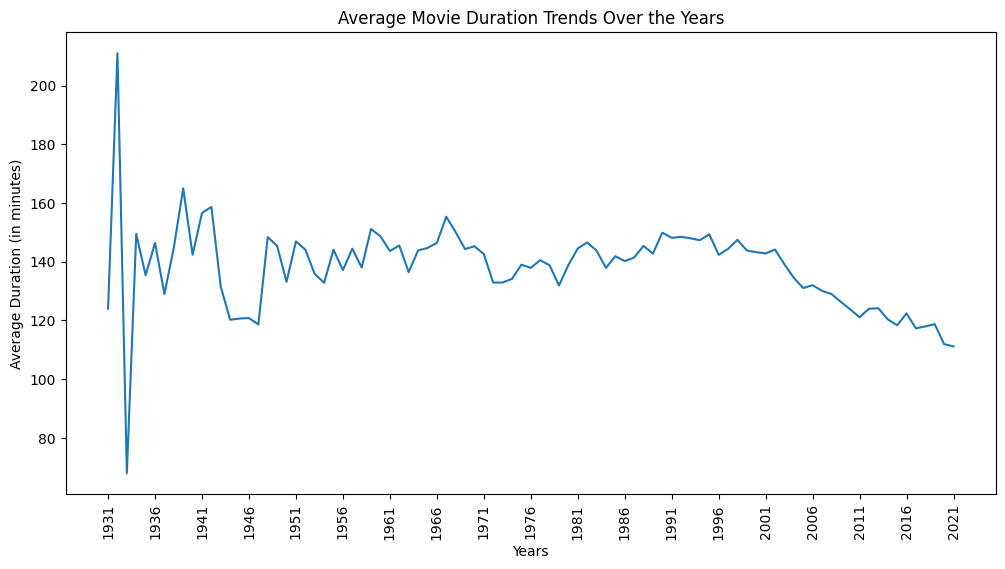

In [ ]:
# Calculate the average movie duration by year
average_durations = df.groupby('Year')['Duration'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=average_durations, x='Year', y='Duration')
ax.set(title="Average Movie Duration Trends Over the Years",
       xlabel="Years",
       ylabel="Average Duration (in minutes)")
ax.set_xticks(range(int(min(average_durations['Year'])), int(max(average_durations['Year'])) + 1, 5))
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Calculate IQR and define lower and upper bounds
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame based on the bounds
df = df[(df['Duration'] >= lower_bound) & (df['Duration'] <= upper_bound)]
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


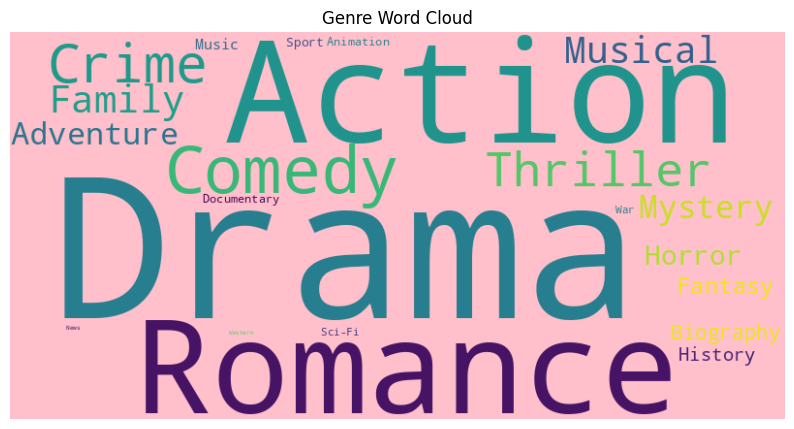

In [ ]:
# Split genres, stack them, and count occurrences
genre_counts = df['Genre'].str.split(', ', expand=True).stack().value_counts()

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='pink').generate_from_frequencies(genre_counts)

# Create a figure and display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

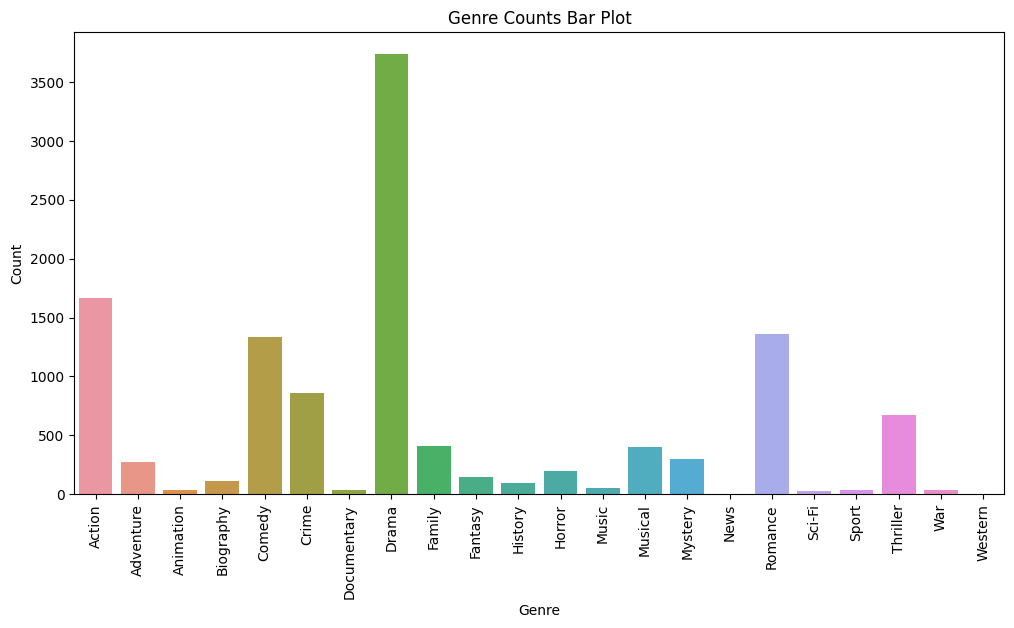

In [ ]:
# Sort genre_counts dictionary and extract labels and counts
genreLabels = sorted(genre_counts.keys())
genreCounts = [genre_counts[label] for label in genreLabels]

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genreLabels, y=genreCounts)
ax.set_xticklabels(labels=genreLabels, rotation=90)
ax.set_title("Genre Counts Bar Plot")
ax.set_xlabel("Genre")
ax.set_ylabel("Count")
plt.show()

In [ ]:
genrePie.loc[genrePie['Count'] < 50, 'Genre'] = 'Other'

# Create a pie chart
fig = px.pie(
    genrePie,
    values='Count',
    names='Genre',
    title='Movie Genres in Indian Cinema'
)

# Show the pie chart
fig.show()

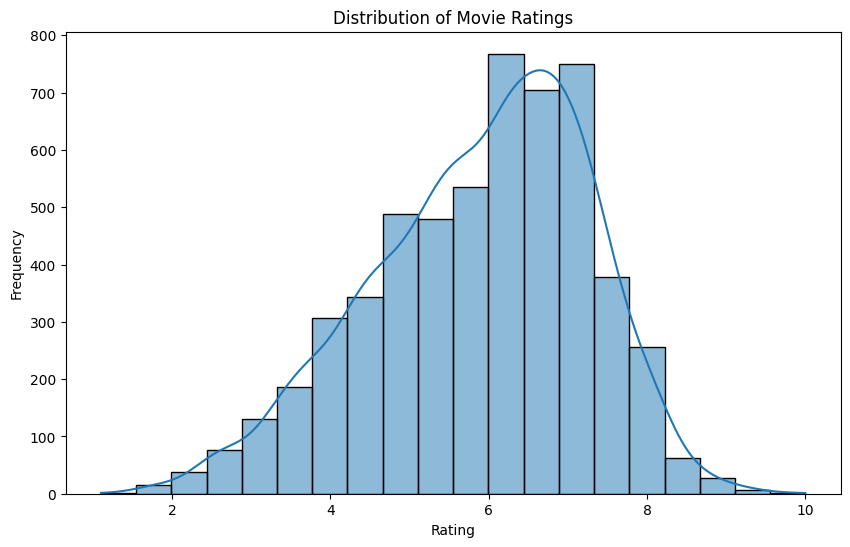

In [ ]:
# Create a histogram plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="Rating", bins=20, kde=True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
plt.show()

In [ ]:
# Calculate Q1 and Q3
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame based on the bounds
df = df[(df['Rating'] >= lower_bound) & (df['Rating'] <= upper_bound)]

# Display the first 5 rows of the filtered DataFrame
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


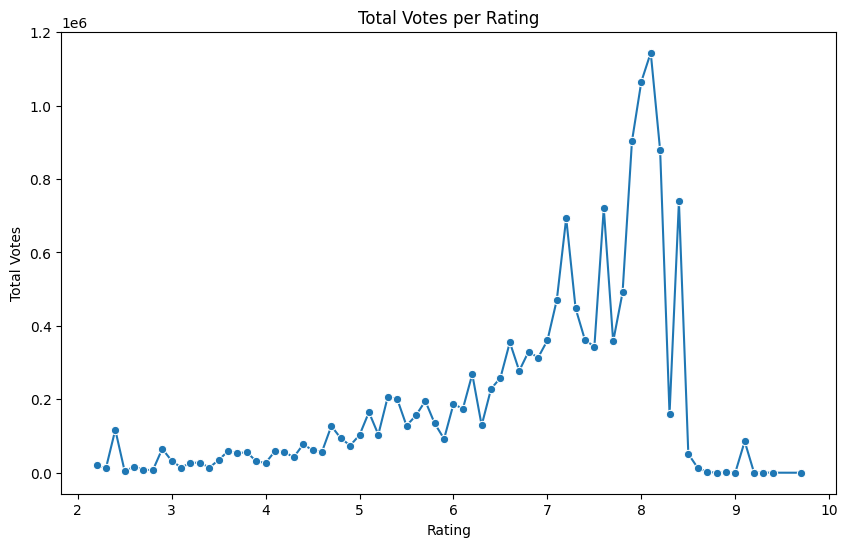

In [ ]:
# Group by 'Rating' and calculate the sum of 'Votes'
rating_votes = df.groupby('Rating')['Votes'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
ax_line_seaborn = sns.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
plt.show()

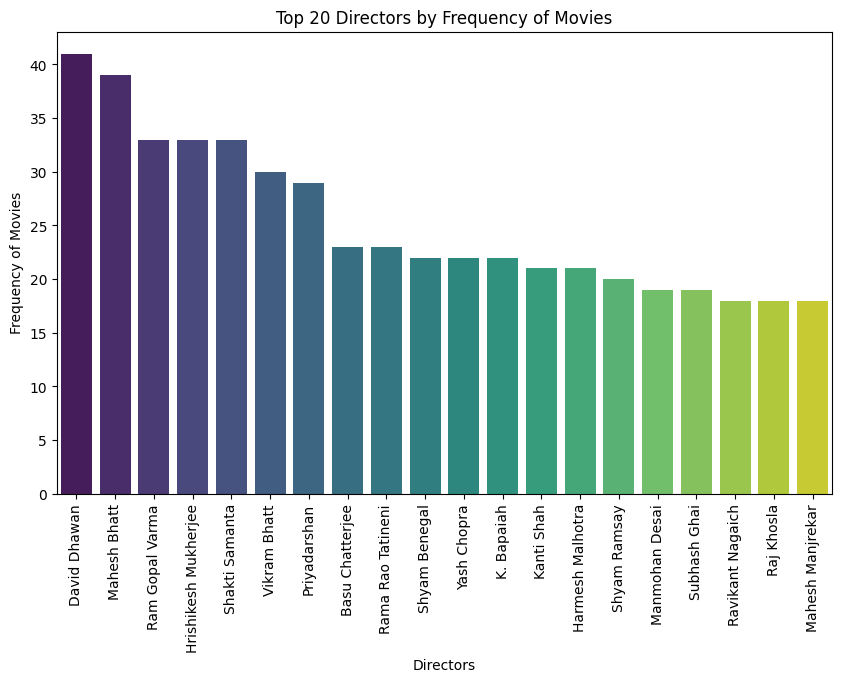

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

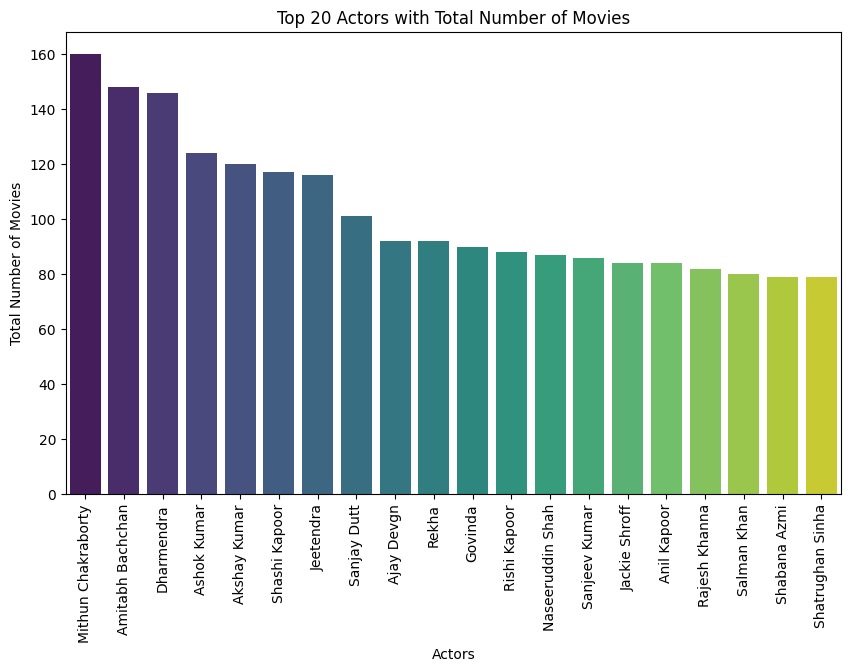

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

# Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Drop the columns you don't want as input features
columns_to_drop = ['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = df.drop(columns_to_drop, axis=1)

# Set 'Rating' as the target variable
y = df['Rating']


In [ ]:
X.head(5)

,Year,Duration,Votes
1,2019.0,109.0,8
3,2019.0,110.0,35
5,1997.0,147.0,827
6,2005.0,142.0,1086
8,2012.0,82.0,326


In [ ]:
y.head(5)

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Model:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Create and train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Create and train a Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=1)
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
# Make predictions with both models
y_linear_pred = linear_model.predict(x_test)
y_tree_pred = decision_tree_model.predict(x_test)

In [ ]:
# Evaluate the Linear Regression model
linear_mse = mean_squared_error(y_test, y_linear_pred)
linear_r2 = r2_score(y_test, y_linear_pred)

In [ ]:
# Evaluate the Decision Tree Regression model
tree_mse = mean_squared_error(y_test, y_tree_pred)
tree_r2 = r2_score(y_test, y_tree_pred)

In [ ]:
lr_preds = linear_model.predict(x_test)  # Replace x_test with your test data

dt_preds = decision_tree_model.predict(x_test)  # Replace x_test with your test data

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("\n")

# Evaluate Linear Regression
LRScore = evaluate_model(y_test, lr_preds, "Linear Regression")

# Evaluate Decision Tree
DTScore = evaluate_model(y_test, dt_preds, "Decision Tree")

Model: Linear Regression
Mean Squared Error: 1.63
R-squared: 0.09


Model: Decision Tree
Mean Squared Error: 2.56
R-squared: -0.44




In [ ]:
mse_lr = 1.63
r2_lr = 0.09
mse_dt = 2.56
r2_dt = -0.44

# Create a DataFrame with model names and their scores
models = pd.DataFrame(
    {
        "MODELS": ["Linear Regression", "Decision Tree"],
        "MSE": [mse_lr, mse_dt],
        "R2": [r2_lr, r2_dt]
    }
)

# Print the DataFrame
print(models)

              MODELS   MSE    R2
0  Linear Regression  1.63  0.09
1      Decision Tree  2.56 -0.44
